# `Testing PCA` 

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### Loading And Displaying Data Table

In [8]:
# load the csv
csv_path = 'time_series_covid19_confirmed_US.csv'
csv = pd.read_csv(csv_path)
#check the data
csv

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,2212,2230,2242,2267,2283,2304,2328,2351,2385,2417
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,7061,7097,7134,7188,7226,7263,7348,7409,7454,7523
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,1079,1080,1090,1092,1095,1098,1107,1112,1113,1117
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,897,907,917,924,926,932,948,961,966,973
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,2188,2222,2253,2286,2297,2335,2378,2400,2429,2488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,873,897,922,932,977,1007,1022,1025,1066,1108
3336,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,518,529,542,544,551,568,614,627,664,686
3337,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3338,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,175,179,188,185,187,190,197,199,203,206


### Extracting data

In [9]:
# extract the list of columns
columns = list(csv.columns)
# daily data are after column 11
days = columns[11:]
SOI = ['Massachusetts', 'Illinois', 'New York', 'Texas', 'California', 'Florida']

In [10]:
def get_state_arr(state, days):
    # restrict to your state's data
    csv_state = csv[csv['Province_State'] == state]
    # find the new daily cases
    daily_new_cases = []
    prev_sum = 0
    for day in days:
        counties_sum = 0
        for county in csv_state[day]:
            counties_sum += county
        
        daily_new_cases.append(counties_sum - prev_sum)
        prev_sum = counties_sum
        state_arr = np.asarray(daily_new_cases)
        state_arr = state_arr/(np.max(abs(state_arr)))
    return state_arr

In [11]:
MA = get_state_arr(SOI[0], days)
IL = get_state_arr(SOI[1], days)
NY = get_state_arr(SOI[2], days)
TX = get_state_arr(SOI[3], days)
CA = get_state_arr(SOI[4], days)
FL = get_state_arr(SOI[5], days)

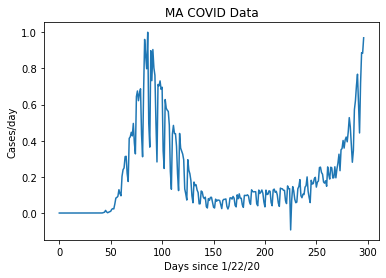

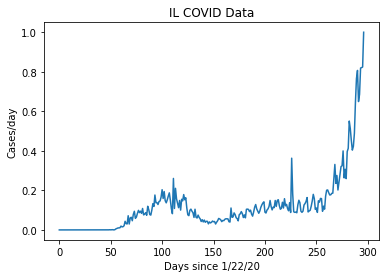

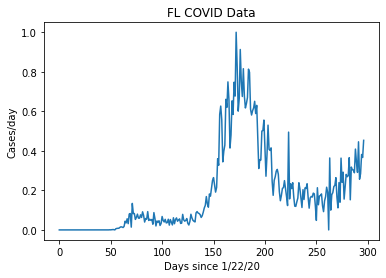

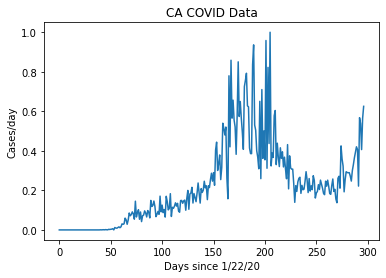

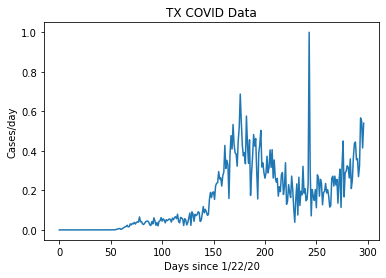

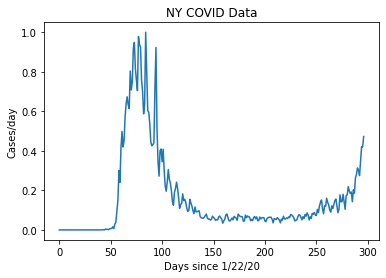

In [12]:
plt.figure(1)
plt.plot(MA)
plt.title('MA COVID Data')
plt.ylabel('Cases/day')
plt.xlabel('Days since 1/22/20')
plt.figure(2)
plt.plot(IL)
plt.title('IL COVID Data')
plt.ylabel('Cases/day')
plt.xlabel('Days since 1/22/20')
plt.figure(3)
plt.plot(FL)
plt.title('FL COVID Data')
plt.ylabel('Cases/day')
plt.xlabel('Days since 1/22/20')
plt.figure(4)
plt.plot(CA)
plt.title('CA COVID Data')
plt.ylabel('Cases/day')
plt.xlabel('Days since 1/22/20')
plt.figure(5)
plt.plot(TX)
plt.title('TX COVID Data')
plt.ylabel('Cases/day')
plt.xlabel('Days since 1/22/20')
plt.figure(6)
plt.plot(NY)
plt.title('NY COVID Data')
plt.ylabel('Cases/day')
plt.xlabel('Days since 1/22/20')
plt.show()

## Idea 1: stack 6 states

In [13]:
states_stacked = np.array([MA,IL, NY, TX, FL, NY])

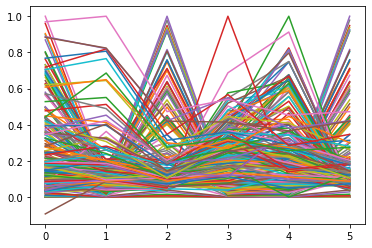

In [14]:
plt.plot(states_stacked)
plt.show()

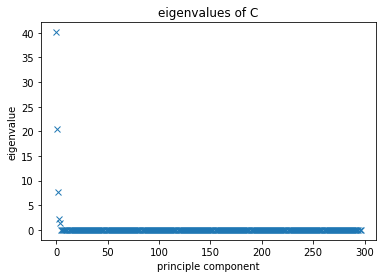

In [15]:
#mu = 
ss_mr  = (states_stacked.T - np.mean(states_stacked, axis = 1).T).T
C = ss_mr.T@ss_mr
D,U = np.linalg.eig(C)
plt.plot(D,'x')
plt.ylabel('eigenvalue')
plt.xlabel('principle component')
plt.title('eigenvalues of C')
#plt.xlim([-1, 20])
plt.show()

In [16]:
len(IL)

297

In [17]:
W_main = U[0:1,:]
Y = W_main@ss_mr.T
ss_rec1 = ((W_main.T@(Y)).T + np.mean(ss_mr, 0).T).T
W_main = U[0:2,:]
Y = W_main@ss_mr.T
ss_rec2 = ((W_main.T@(Y)).T + np.mean(ss_mr, 0).T).T
#mu_rec = np.mean(ECG_rec,0)
#plt.plot(t[0:4001], mu_rec, label = 'reconstructed mu', lw = 5 )
#plt.plot(t[0:4001], mu_new, label = 'original mu', lw = 2)
#plt.legend()
#plt.show()

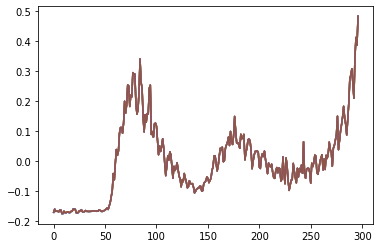

In [18]:
plt.plot(ss_rec1)

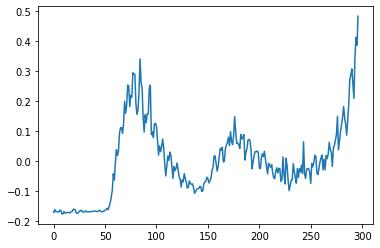

In [19]:
plt.plot(ss_rec2[:,5])

In [20]:
np.shape(((W_main.T@Y).T + np.mean(ss_mr, 0).T).T)

(297, 6)

In [21]:
np.shape(np.mean(ss_mr,0))

(297,)

## Idea 2: stack weekly

###### MA

In [22]:
MA_weekly = np.zeros((42,7))

In [23]:
for i in range(42):
    MA_weekly[i] = MA[i*7:i*7+7]
MA_mu = np.mean(MA_weekly, 0)
MA_w_mr = MA_weekly - MA_mu
for i in range(42):
    MA_weekly[i] = MA[i*7:i*7+7]
MA_mu = np.mean(MA_weekly, 0)
MA_w_mr = MA_weekly - MA_mu


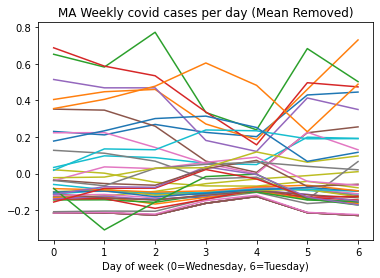

In [24]:
plt.plot(MA_w_mr.T)
plt.title('MA Weekly covid cases per day (Mean Removed)')
plt.xlabel('Day of week (0=Wednesday, 6=Tuesday)')
plt.show()

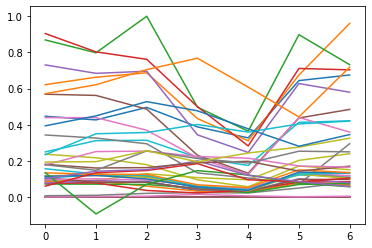

In [25]:
plt.plot(MA_weekly.T)

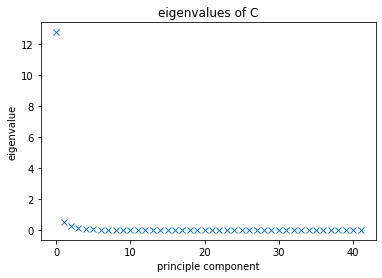

In [26]:
C = MA_w_mr@MA_w_mr.T
D,U = np.linalg.eig(C)
plt.plot(D,'x')
plt.ylabel('eigenvalue')
plt.xlabel('principle component')
plt.title('eigenvalues of C')
#plt.xlim([-1, 20])
plt.show()

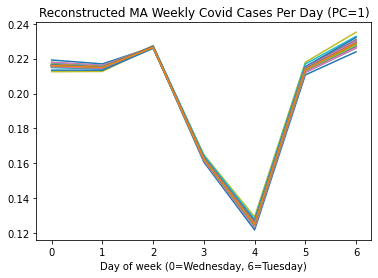

In [27]:
W_main = U[0:1,:]
Y = W_main@MA_w_mr
MA_w_rec = (W_main.T@(Y)) + MA_mu
plt.plot(MA_w_rec.T)
plt.title('Reconstructed MA Weekly Covid Cases Per Day (PC=1)')
plt.xlabel('Day of week (0=Wednesday, 6=Tuesday)')
plt.show()

weird week is march 11!!!

###### IL

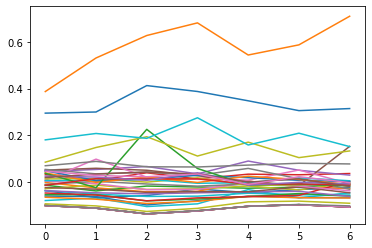

In [28]:
IL_weekly = np.zeros((42,7))
for i in range(42):
    IL_weekly[i] = IL[i*7:i*7+7]
IL_mu = np.mean(IL_weekly, 0)
IL_w_mr = IL_weekly - IL_mu
plt.plot(IL_w_mr.T)
plt.show()

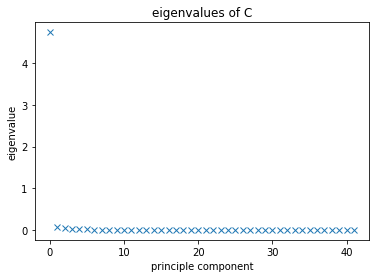

In [29]:
C = IL_w_mr@IL_w_mr.T
D,U = np.linalg.eig(C)
plt.plot(D,'x')
plt.ylabel('eigenvalue')
plt.xlabel('principle component')
plt.title('eigenvalues of C')
#plt.xlim([-1, 20])
plt.show()

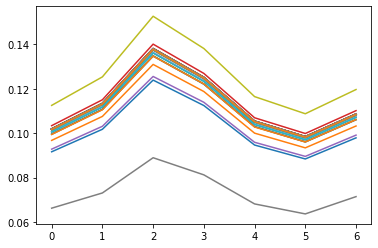

In [30]:
W_main = U[0:1,:]
Y = W_main@IL_w_mr
IL_w_rec = (W_main.T@(Y)) + IL_mu
plt.plot(IL_w_rec.T)
plt.show()

###### CA

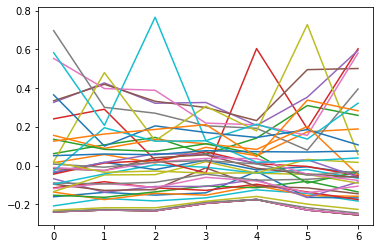

In [31]:
CA_weekly = np.zeros((42,7))
for i in range(42):
    CA_weekly[i] = CA[i*7:i*7+7]
CA_mu = np.mean(CA_weekly, 0)
CA_w_mr = CA_weekly - CA_mu
plt.plot(CA_w_mr.T)
plt.show()

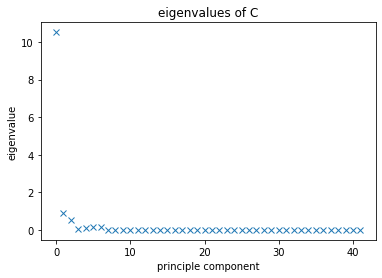

In [32]:
C = CA_w_mr@CA_w_mr.T
D,U = np.linalg.eig(C)
plt.plot(D,'x')
plt.ylabel('eigenvalue')
plt.xlabel('principle component')
plt.title('eigenvalues of C')
#plt.xlim([-1, 20])
plt.show()

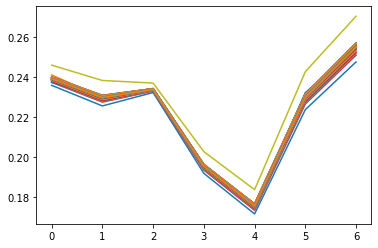

In [33]:
W_main = U[0:1,:]
Y = W_main@CA_w_mr
CA_w_rec = (W_main.T@(Y)) + CA_mu
plt.plot(CA_w_rec.T)
plt.show()

###### NY

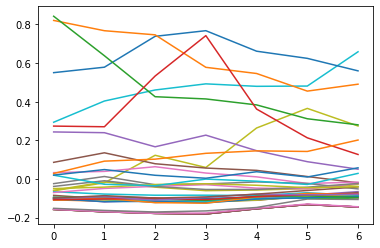

In [34]:
NY_weekly = np.zeros((42,7))
for i in range(42):
    NY_weekly[i] = NY[i*7:i*7+7]
NY_mu = np.mean(NY_weekly, 0)
NY_w_mr = NY_weekly - NY_mu
plt.plot(NY_w_mr.T)
plt.show()

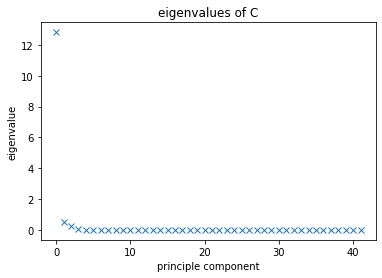

In [35]:
C = NY_w_mr@NY_w_mr.T
D,U = np.linalg.eig(C)
plt.plot(D,'x')
plt.ylabel('eigenvalue')
plt.xlabel('principle component')
plt.title('eigenvalues of C')
#plt.xlim([-1, 20])
plt.show()

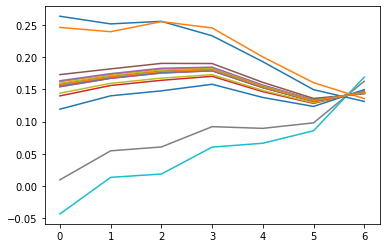

In [36]:
W_main = U[0:1,:]
Y = W_main@NY_w_mr
NY_w_rec = (W_main.T@(Y)) + NY_mu
plt.plot(NY_w_rec.T)
plt.show()

###### FL

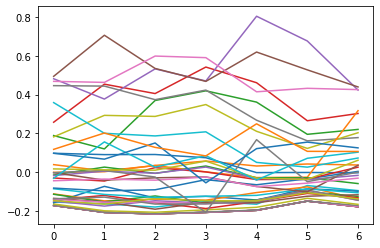

In [37]:
FL_weekly = np.zeros((42,7))
for i in range(42):
    FL_weekly[i] = FL[i*7:i*7+7]
FL_mu = np.mean(FL_weekly, 0)
FL_w_mr = FL_weekly - FL_mu
plt.plot(FL_w_mr.T)
plt.show()

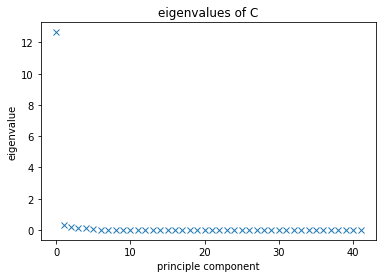

In [38]:
C = FL_w_mr@FL_w_mr.T
D,U = np.linalg.eig(C)
plt.plot(D,'x')
plt.ylabel('eigenvalue')
plt.xlabel('principle component')
plt.title('eigenvalues of C')
#plt.xlim([-1, 20])
plt.show()

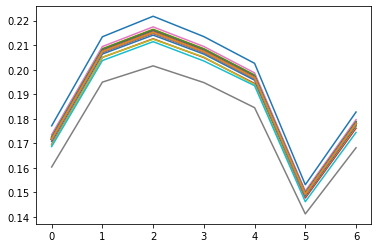

In [39]:
W_main = U[0:1,:]
Y = W_main@FL_w_mr
FL_w_rec = (W_main.T@(Y)) + FL_mu
plt.plot(FL_w_rec.T)
plt.show()

###### TX

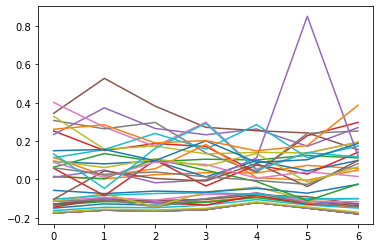

In [40]:
TX_weekly = np.zeros((42,7))
for i in range(42):
    TX_weekly[i] = TX[i*7:i*7+7]
TX_mu = np.mean(TX_weekly, 0)
TX_w_mr = TX_weekly - TX_mu
plt.plot(TX_w_mr.T)
plt.show()

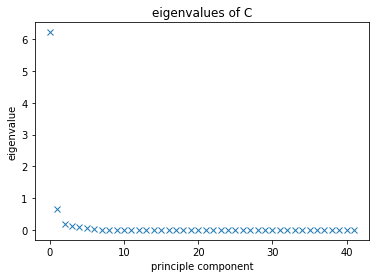

In [41]:
C = TX_w_mr@TX_w_mr.T
D,U = np.linalg.eig(C)
plt.plot(D,'x')
plt.ylabel('eigenvalue')
plt.xlabel('principle component')
plt.title('eigenvalues of C')
#plt.xlim([-1, 20])
plt.show()

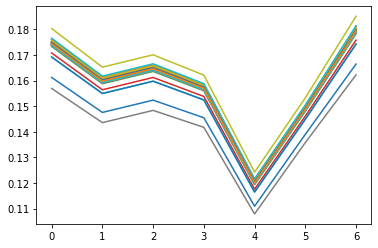

In [42]:
W_main = U[0:1,:]
Y = W_main@TX_w_mr
TX_w_rec = (W_main.T@(Y)) + TX_mu
plt.plot(TX_w_rec.T)
plt.show()

#### Comparing

In [43]:
TX_m = np.mean(TX_w_rec, 0);FL_m = np.mean(FL_w_rec, 0); MA_m = np.mean(MA_w_rec, 0); NY_m = np.mean(NY_w_rec, 0); CA_m = np.mean(CA_w_rec, 0); IL_m = np.mean(IL_w_rec, 0)

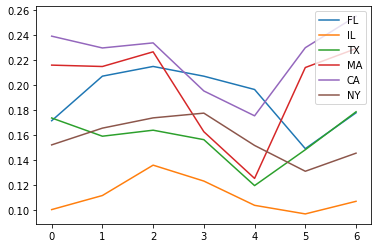

In [44]:
plt.plot(FL_m)
plt.plot(IL_m)
plt.plot(TX_m)
plt.plot(MA_m)
plt.plot(CA_m)
plt.plot(NY_m)
plt.legend(['FL', 'IL', 'TX', 'MA', 'CA', 'NY'])
plt.show()


# 50 State Comparison

In [45]:
def PCA_weekly_rec(state, states, nationwide):
    ind = np.where(states ==  state)
    current = US[ind][0]
    weekly = np.zeros((42,7))
    for i in range(42):
        weekly[i] = current[i*7:i*7+7]
    mu = np.mean(weekly, 0)
    weekly_mr = weekly - mu
    C = weekly_mr@weekly_mr.T
    D,U = np.linalg.eig(C)
    W_main = U[0:1,:]
    Y = W_main@weekly_mr
    weekly_rec = (W_main.T@(Y)) + mu
    weekly_rec_mu = np.mean(weekly_rec, 0)
    return weekly, weekly_mr, weekly_rec, weekly_rec_mu

In [46]:
states = np.array(["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"])
US = np.zeros((51, 297))
for i in range(len(states)):
    US[i] = get_state_arr(states[i], days)

In [47]:
AK_weekly, AK_weekly_mr, AK_weekly_rec, AK_weekly_rec_mu= PCA_weekly_rec(states[0],states, US)
AL_weekly, AL_weekly_mr, AL_weekly_rec, AL_weekly_rec_mu= PCA_weekly_rec(states[1],states, US)
AR_weekly, AR_weekly_mr, AR_weekly_rec, AR_weekly_rec_mu= PCA_weekly_rec(states[2],states, US)
AZ_weekly, AZ_weekly_mr, AZ_weekly_rec, AZ_weekly_rec_mu= PCA_weekly_rec(states[3],states, US)
CA_weekly, CA_weekly_mr, CA_weekly_rec, CA_weekly_rec_mu= PCA_weekly_rec(states[4],states, US)
CO_weekly, CO_weekly_mr, CO_weekly_rec, CO_weekly_rec_mu= PCA_weekly_rec(states[5],states, US)
CT_weekly, CT_weekly_mr, CT_weekly_rec, CT_weekly_rec_mu= PCA_weekly_rec(states[6],states, US)
DE_weekly, DE_weekly_mr, DE_weekly_rec, DE_weekly_rec_mu= PCA_weekly_rec(states[7],states, US)
FL_weekly, FL_weekly_mr, FL_weekly_rec, FL_weekly_rec_mu= PCA_weekly_rec(states[8],states, US)
GA_weekly, GA_weekly_mr, GA_weekly_rec, GA_weekly_rec_mu= PCA_weekly_rec(states[9],states, US)
HI_weekly, HI_weekly_mr, HI_weekly_rec, HI_weekly_rec_mu= PCA_weekly_rec(states[10],states, US)
IA_weekly, IA_weekly_mr, IA_weekly_rec, IA_weekly_rec_mu= PCA_weekly_rec(states[11],states, US)
ID_weekly, ID_weekly_mr, ID_weekly_rec, ID_weekly_rec_mu= PCA_weekly_rec(states[12],states, US)
IL_weekly, IL_weekly_mr, IL_weekly_rec, IL_weekly_rec_mu= PCA_weekly_rec(states[13],states, US)
IN_weekly, IN_weekly_mr, IN_weekly_rec, IN_weekly_rec_mu= PCA_weekly_rec(states[14],states, US)
KS_weekly, KS_weekly_mr, KS_weekly_rec, KS_weekly_rec_mu= PCA_weekly_rec(states[15],states, US)
KY_weekly, KY_weekly_mr, KY_weekly_rec, KY_weekly_rec_mu= PCA_weekly_rec(states[16],states, US)
LA_weekly, LA_weekly_mr, LA_weekly_rec, LA_weekly_rec_mu= PCA_weekly_rec(states[17],states, US)
MA_weekly, MA_weekly_mr, MA_weekly_rec, MA_weekly_rec_mu= PCA_weekly_rec(states[18],states, US)
MD_weekly, MD_weekly_mr, MD_weekly_rec, MD_weekly_rec_mu= PCA_weekly_rec(states[19],states, US)
ME_weekly, ME_weekly_mr, ME_weekly_rec, ME_weekly_rec_mu= PCA_weekly_rec(states[20],states, US)
MI_weekly, MI_weekly_mr, MI_weekly_rec, MI_weekly_rec_mu= PCA_weekly_rec(states[21],states, US)
MN_weekly, MN_weekly_mr, MN_weekly_rec, MN_weekly_rec_mu= PCA_weekly_rec(states[22],states, US)
MO_weekly, MO_weekly_mr, MO_weekly_rec, MO_weekly_rec_mu= PCA_weekly_rec(states[23],states, US)
MS_weekly, MS_weekly_mr, MS_weekly_rec, MS_weekly_rec_mu= PCA_weekly_rec(states[24],states, US)
MT_weekly, MT_weekly_mr, MT_weekly_rec, MT_weekly_rec_mu= PCA_weekly_rec(states[25],states, US)
NC_weekly, NC_weekly_mr, NC_weekly_rec, NC_weekly_rec_mu= PCA_weekly_rec(states[26],states, US)
ND_weekly, ND_weekly_mr, ND_weekly_rec, ND_weekly_rec_mu= PCA_weekly_rec(states[27],states, US)
NE_weekly, NE_weekly_mr, NE_weekly_rec, NE_weekly_rec_mu= PCA_weekly_rec(states[28],states, US)
NH_weekly, NH_weekly_mr, NH_weekly_rec, NH_weekly_rec_mu= PCA_weekly_rec(states[29],states, US)
NJ_weekly, NJ_weekly_mr, NJ_weekly_rec, NJ_weekly_rec_mu= PCA_weekly_rec(states[30],states, US)
NM_weekly, NM_weekly_mr, NM_weekly_rec, NM_weekly_rec_mu= PCA_weekly_rec(states[31],states, US)
NV_weekly, NV_weekly_mr, NV_weekly_rec, NV_weekly_rec_mu= PCA_weekly_rec(states[32],states, US)
NY_weekly, NY_weekly_mr, NY_weekly_rec, NY_weekly_rec_mu= PCA_weekly_rec(states[33],states, US)
OH_weekly, OH_weekly_mr, OH_weekly_rec, OH_weekly_rec_mu= PCA_weekly_rec(states[34],states, US)
OK_weekly, OK_weekly_mr, OK_weekly_rec, OK_weekly_rec_mu= PCA_weekly_rec(states[35],states, US)
OR_weekly, OR_weekly_mr, OR_weekly_rec, OR_weekly_rec_mu= PCA_weekly_rec(states[36],states, US)
PA_weekly, PA_weekly_mr, PA_weekly_rec, PA_weekly_rec_mu= PCA_weekly_rec(states[37],states, US)
PR_weekly, PR_weekly_mr, PR_weekly_rec, PR_weekly_rec_mu= PCA_weekly_rec(states[38],states, US)
RI_weekly, RI_weekly_mr, RI_weekly_rec, RI_weekly_rec_mu= PCA_weekly_rec(states[39],states, US)
SC_weekly, SC_weekly_mr, SC_weekly_rec, SC_weekly_rec_mu= PCA_weekly_rec(states[40],states, US)
SD_weekly, SD_weekly_mr, SD_weekly_rec, SD_weekly_rec_mu= PCA_weekly_rec(states[41],states, US)
TN_weekly, TN_weekly_mr, TN_weekly_rec, TN_weekly_rec_mu= PCA_weekly_rec(states[42],states, US)
TX_weekly, TX_weekly_mr, TX_weekly_rec, TX_weekly_rec_mu= PCA_weekly_rec(states[43],states, US)
UT_weekly, UT_weekly_mr, UT_weekly_rec, UT_weekly_rec_mu= PCA_weekly_rec(states[44],states, US)
VA_weekly, VA_weekly_mr, VA_weekly_rec, VA_weekly_rec_mu= PCA_weekly_rec(states[45],states, US)
VT_weekly, VT_weekly_mr, VT_weekly_rec, VT_weekly_rec_mu= PCA_weekly_rec(states[46],states, US)
WA_weekly, WA_weekly_mr, WA_weekly_rec, WA_weekly_rec_mu= PCA_weekly_rec(states[47],states, US)
WI_weekly, WI_weekly_mr, WI_weekly_rec, WI_weekly_rec_mu= PCA_weekly_rec(states[48],states, US)
WV_weekly, WV_weekly_mr, WV_weekly_rec, WV_weekly_rec_mu= PCA_weekly_rec(states[49],states, US)
WY_weekly, WY_weekly_mr, WY_weekly_rec, WY_weekly_rec_mu= PCA_weekly_rec(states[50],states, US)

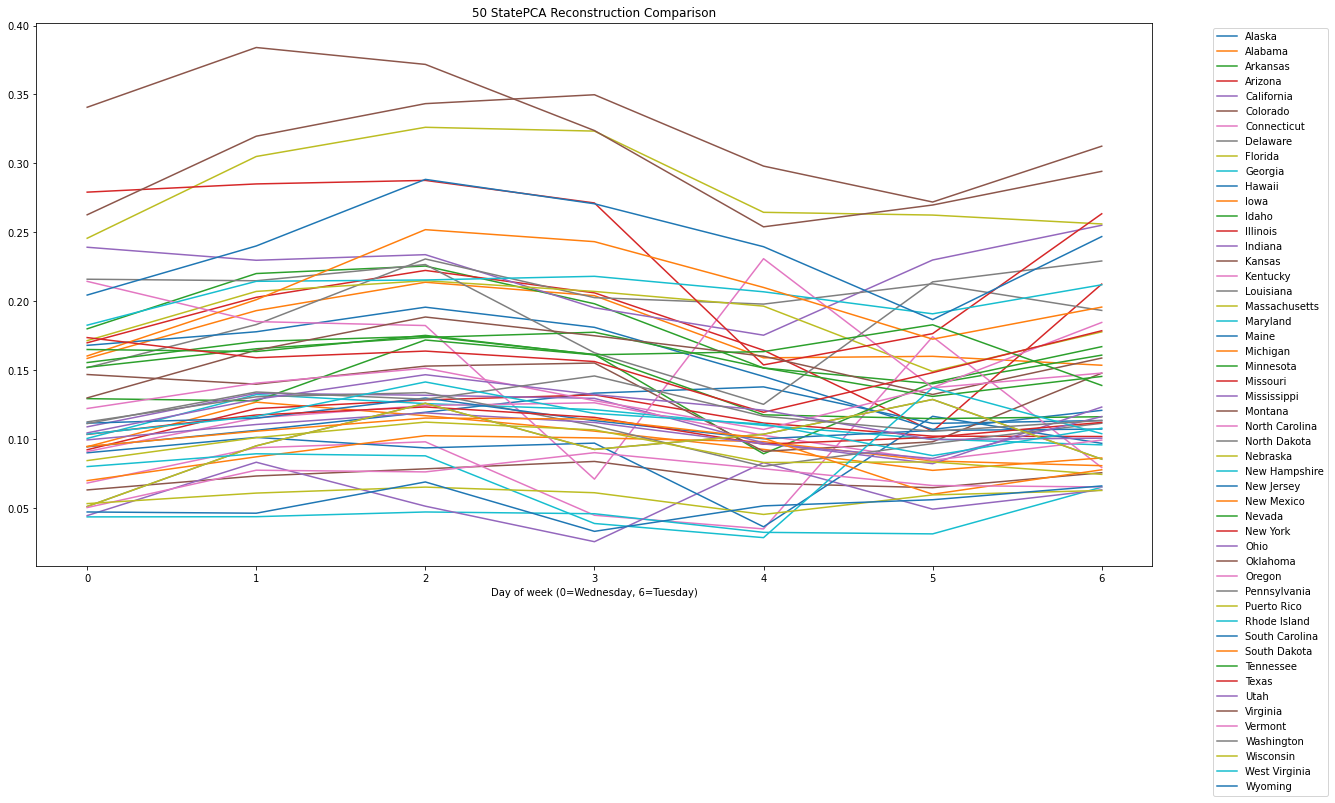

In [48]:
plt.figure(figsize=(20,10))
plt.plot(AK_weekly_rec_mu); plt.plot(AL_weekly_rec_mu); plt.plot(AR_weekly_rec_mu); plt.plot(AZ_weekly_rec_mu)
plt.plot(CA_weekly_rec_mu); 
plt.plot(CO_weekly_rec_mu); plt.plot(CT_weekly_rec_mu); plt.plot(DE_weekly_rec_mu); plt.plot(FL_weekly_rec_mu)
plt.plot(GA_weekly_rec_mu); 
plt.plot(HI_weekly_rec_mu); plt.plot(IA_weekly_rec_mu); plt.plot(ID_weekly_rec_mu)
plt.plot(IN_weekly_rec_mu); plt.plot(KS_weekly_rec_mu); plt.plot(KY_weekly_rec_mu); plt.plot(LA_weekly_rec_mu)
plt.plot(MA_weekly_rec_mu); 
plt.plot(MD_weekly_rec_mu); plt.plot(ME_weekly_rec_mu); plt.plot(MI_weekly_rec_mu)
plt.plot(MN_weekly_rec_mu); plt.plot(MO_weekly_rec_mu); plt.plot(MS_weekly_rec_mu); plt.plot(MT_weekly_rec_mu)
plt.plot(NC_weekly_rec_mu); plt.plot(ND_weekly_rec_mu); plt.plot(NE_weekly_rec_mu); plt.plot(NH_weekly_rec_mu)
plt.plot(NJ_weekly_rec_mu); plt.plot(NM_weekly_rec_mu); plt.plot(NV_weekly_rec_mu); plt.plot(NY_weekly_rec_mu)
plt.plot(OH_weekly_rec_mu); plt.plot(OK_weekly_rec_mu); plt.plot(OR_weekly_rec_mu); plt.plot(PA_weekly_rec_mu)
plt.plot(PR_weekly_rec_mu); plt.plot(PR_weekly_rec_mu); plt.plot(RI_weekly_rec_mu); plt.plot(SC_weekly_rec_mu)
plt.plot(SD_weekly_rec_mu); plt.plot(TN_weekly_rec_mu); plt.plot(TX_weekly_rec_mu); plt.plot(UT_weekly_rec_mu)
plt.plot(VA_weekly_rec_mu); plt.plot(VT_weekly_rec_mu); plt.plot(WA_weekly_rec_mu); plt.plot(WI_weekly_rec_mu)
plt.plot(WV_weekly_rec_mu); plt.plot(WY_weekly_rec_mu)
plt.legend(states, bbox_to_anchor=(1.05, 1))
plt.xlabel('Day of week (0=Wednesday, 6=Tuesday)')
plt.title('50 StatePCA Reconstruction Comparison')
#plt.ylim([0, 1300])
plt.show()

In [49]:
pca_means = [AK_weekly_rec_mu, AL_weekly_rec_mu, AR_weekly_rec_mu, AZ_weekly_rec_mu, CA_weekly_rec_mu, 
CO_weekly_rec_mu, CT_weekly_rec_mu, DE_weekly_rec_mu, FL_weekly_rec_mu, GA_weekly_rec_mu, HI_weekly_rec_mu, 
IA_weekly_rec_mu, ID_weekly_rec_mu, IL_weekly_rec_mu, IN_weekly_rec_mu, KS_weekly_rec_mu, KY_weekly_rec_mu, LA_weekly_rec_mu,
MA_weekly_rec_mu, MD_weekly_rec_mu, ME_weekly_rec_mu, MI_weekly_rec_mu, MN_weekly_rec_mu, MO_weekly_rec_mu, 
MS_weekly_rec_mu, MT_weekly_rec_mu, NC_weekly_rec_mu, ND_weekly_rec_mu, NE_weekly_rec_mu, NH_weekly_rec_mu,
NJ_weekly_rec_mu, NM_weekly_rec_mu, NV_weekly_rec_mu, NY_weekly_rec_mu, OH_weekly_rec_mu, OK_weekly_rec_mu, 
OR_weekly_rec_mu, PA_weekly_rec_mu, PR_weekly_rec_mu, RI_weekly_rec_mu, SC_weekly_rec_mu,
SD_weekly_rec_mu, TN_weekly_rec_mu, TX_weekly_rec_mu, UT_weekly_rec_mu, VA_weekly_rec_mu, VT_weekly_rec_mu, 
WA_weekly_rec_mu, WI_weekly_rec_mu, WV_weekly_rec_mu, WY_weekly_rec_mu]
state_pca_means = np.zeros((51,7))
for i in range(len(pca_means)):
    state_pca_means[i,:] = pca_means[i]


meanofmeans = state_pca_means.mean(axis=1)


state_pca_mr = np.zeros((51,7))
for s in range(51):
    state = state_pca_means[s,:]
    statemr = []
    for d in range(7):
        statemr.append(state[d] - meanofmeans[s])
    state_pca_mr[s,:] = statemr

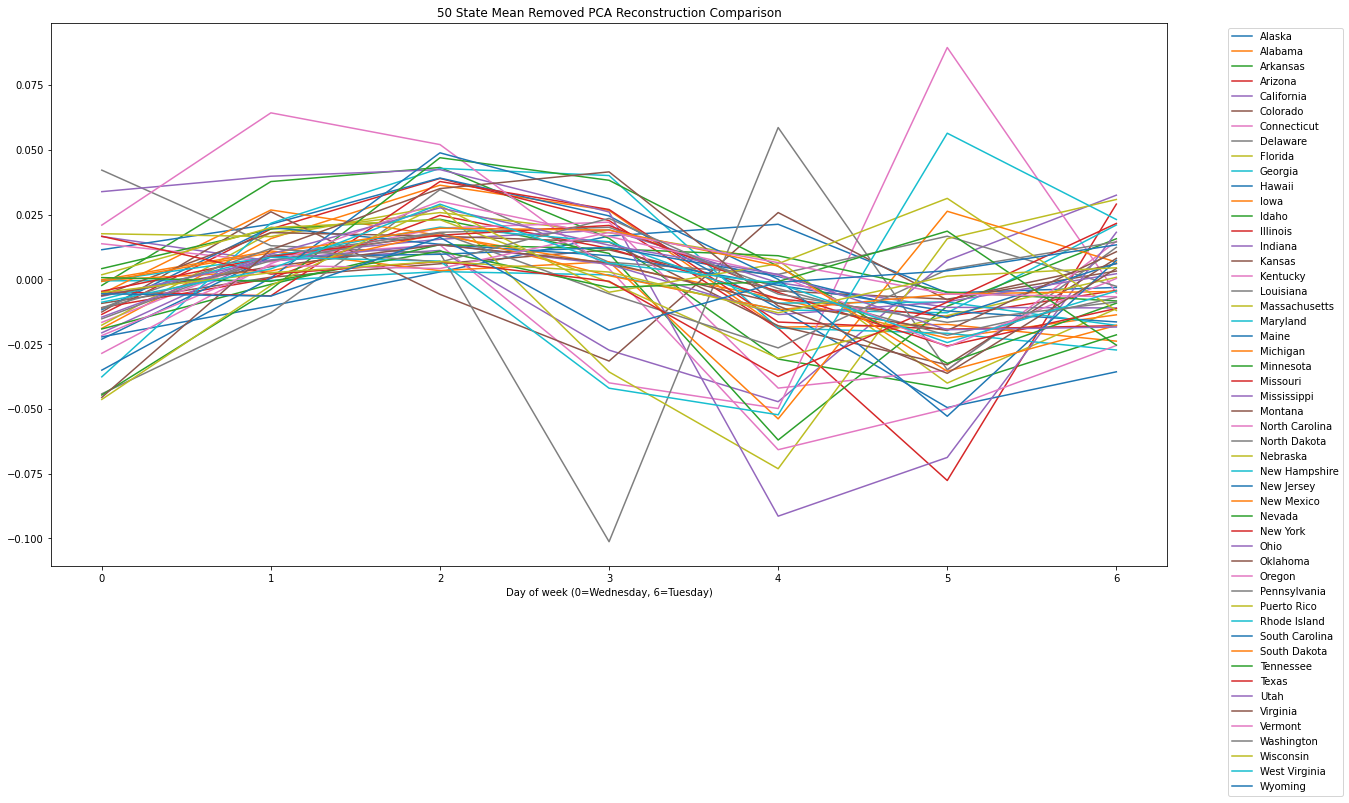

In [50]:
plt.figure(figsize=(20,10))
for i in range(51):
    state = state_pca_mr[i,:]
    plt.plot(state)
plt.legend(states, bbox_to_anchor=(1.05, 1))
plt.title('50 State Mean Removed PCA Reconstruction Comparison')
plt.xlabel('Day of week (0=Wednesday, 6=Tuesday)')
plt.show()
#plt.ylim(-100,100)

## Grouping by Census Region 

#### PCA

In [51]:
#northeast
CR_1 = np.array([state_pca_mr[6,:], state_pca_mr[18,:], state_pca_mr[20,:], state_pca_mr[29,:], state_pca_mr[30,:], state_pca_mr[33,:], state_pca_mr[38,:], state_pca_mr[39,:], state_pca_mr[46,:]])
#mid atlantic
CR_2 = np.array([state_pca_mr[7,:], state_pca_mr[16,:], state_pca_mr[19,:],state_pca_mr[34,:], state_pca_mr[37,:], state_pca_mr[42,:], state_pca_mr[45,:], state_pca_mr[49,:]])
#south
CR_3 = np.array([state_pca_mr[1,:], state_pca_mr[8,:], state_pca_mr[9,:], state_pca_mr[17,:], state_pca_mr[24,:], state_pca_mr[26,:], state_pca_mr[40,:]])
#midwest
CR_4 = np.array([state_pca_mr[2,:], state_pca_mr[11,:], state_pca_mr[13,:],state_pca_mr[14,:], state_pca_mr[21,:], state_pca_mr[22,:], state_pca_mr[23,:], state_pca_mr[48,:]])
#mountain
CR_5 = np.array([state_pca_mr[3,:], state_pca_mr[5,:], state_pca_mr[15,:], state_pca_mr[25,:], state_pca_mr[27,:], state_pca_mr[28,:], state_pca_mr[31,:], state_pca_mr[35,:], state_pca_mr[41,:], state_pca_mr[43,:], state_pca_mr[44,:], state_pca_mr[50,:]])
#west
CR_6 = np.array([state_pca_mr[0,:], state_pca_mr[4,:], state_pca_mr[10,:], state_pca_mr[12,:], state_pca_mr[32,:], state_pca_mr[36,:], state_pca_mr[47,:]])


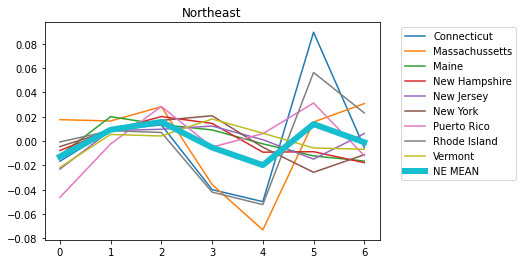

In [52]:
plt.plot(CR_1.T)
plt.plot(np.mean(CR_1, 0), LW= 6)
plt.legend(['Connecticut', 'Massachussetts', 'Maine', 'New Hampshire','New Jersey', 'New York','Puerto Rico', 'Rhode Island','Vermont', 'NE MEAN'], bbox_to_anchor=(1.05, 1))
plt.title('Northeast')
plt.show()

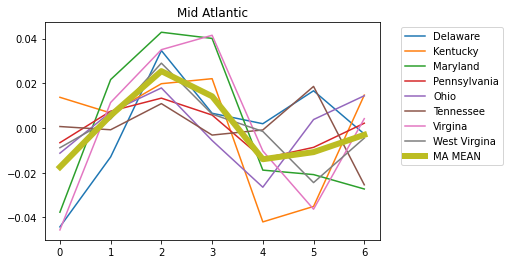

8

In [53]:
plt.plot(CR_2.T)
plt.plot(np.mean(CR_2, 0), LW = 6)
plt.legend(['Delaware','Kentucky','Maryland','Pennsylvania', 'Ohio', 'Tennessee' ,'Virgina','West Virgina', 'MA MEAN'],bbox_to_anchor=(1.05, 1))
plt.title('Mid Atlantic')
plt.show()
len(CR_2)

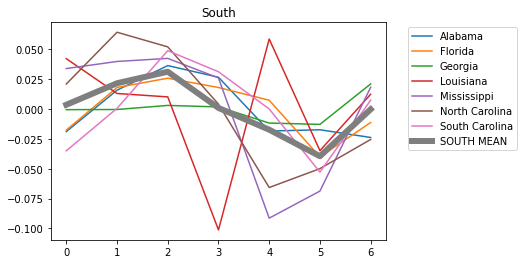

In [54]:
plt.plot(CR_3.T)
plt.plot(np.mean(CR_3, 0), LW = 6)
plt.legend(['Alabama', 'Florida', 'Georgia', 'Louisiana', 'Mississippi', 'North Carolina', 'South Carolina', 'SOUTH MEAN'],bbox_to_anchor=(1.05, 1))
plt.title('South')
plt.show()

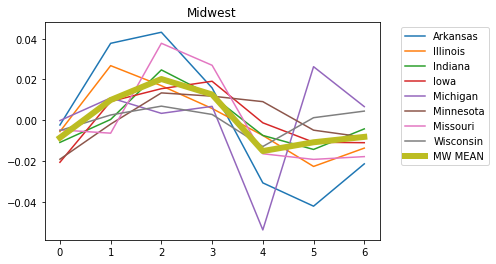

In [55]:
plt.plot(CR_4.T)
plt.plot(np.mean(CR_4, 0), LW = 6)
plt.legend(['Arkansas','Illinois', 'Indiana', 'Iowa', 'Michigan', 'Minnesota', 'Missouri','Wisconsin', 'MW MEAN'], bbox_to_anchor=(1.05, 1))
plt.title('Midwest')
plt.show()

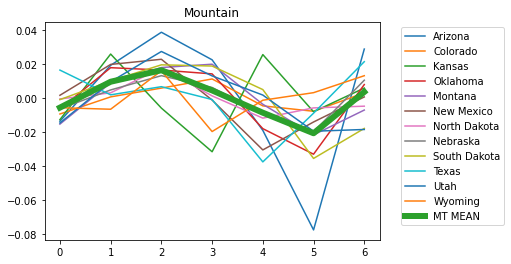

In [56]:
plt.plot(CR_5.T)
plt.plot(np.mean(CR_5, 0), LW = 6)
plt.legend(['Arizona','Colorado','Kansas', 'Oklahoma', 'Montana','New Mexico','North Dakota','Nebraska','South Dakota','Texas','Utah','Wyoming', 'MT MEAN'], bbox_to_anchor=(1.05, 1))
plt.title('Mountain')
plt.show()

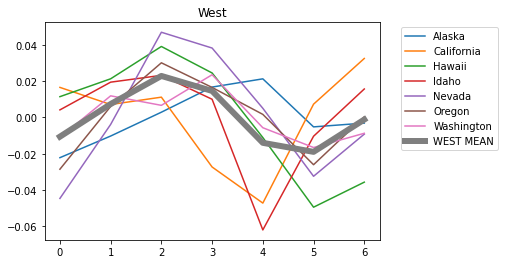

In [57]:
plt.plot(CR_6.T)
plt.plot(np.mean(CR_6, 0), LW = 6)
plt.legend(['Alaska', 'California', 'Hawaii', 'Idaho', 'Nevada', 'Oregon', 'Washington', 'WEST MEAN'], bbox_to_anchor=(1.05, 1))
plt.title('West')
plt.show()

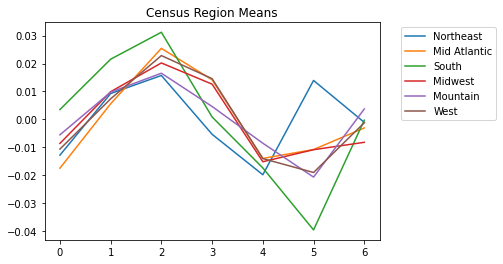

In [58]:
plt.plot(np.mean(CR_1, 0))
plt.plot(np.mean(CR_2, 0))
plt.plot(np.mean(CR_3, 0))
plt.plot(np.mean(CR_4, 0))
plt.plot(np.mean(CR_5, 0))
plt.plot(np.mean(CR_6, 0))
plt.title('Census Region Means')
plt.legend(['Northeast', 'Mid Atlantic', 'South', 'Midwest', 'Mountain', 'West'], bbox_to_anchor=(1.05, 1))
plt.show()

#### Cases

In [67]:
#northeast
CR_C1 = np.array([US[6,:], US[18,:], US[20,:], US[29,:], US[30,:], US[33,:], US[38,:], US[39,:], US[46,:]])
#mid atlantic
CR_C2 = np.array([US[7,:], US[16,:], US[19,:], US[34,:], US[37,:], US[42,:], US[45,:], US[49,:]])
#south
CR_C3 = np.array([US[1,:], US[8,:], US[9,:], US[17,:], US[24,:], US[26,:], US[40,:]])
#midwest
CR_C4 = np.array([US[2,:], US[11,:], US[13,:], US[14,:], US[21,:], US[22,:], US[23,:], US[48,:]])
#mountain
CR_C5 = np.array([US[3,:], US[5,:], US[15,:], US[25,:], US[27,:], US[28,:], US[31,:], US[35,:], US[41,:], US[43,:], US[44,:], US[50,:]])
#west
CR_C6 = np.array([US[0,:], US[4,:], US[10,:], US[12,:], US[32,:], US[36,:], US[47,:]])


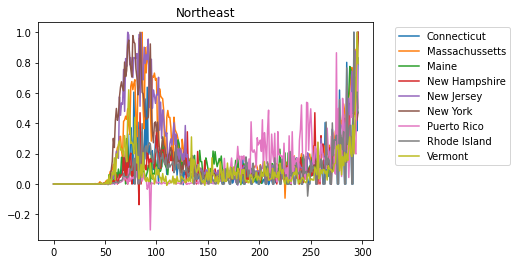

In [70]:
plt.plot(CR_C1.T)
plt.legend(['Connecticut', 'Massachussetts', 'Maine', 'New Hampshire','New Jersey', 'New York','Puerto Rico', 'Rhode Island','Vermont', 'NE MEAN'], bbox_to_anchor=(1.05, 1))
plt.title('Northeast')
plt.show()

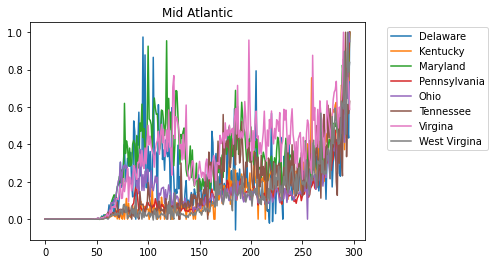

In [71]:
plt.plot(CR_C2.T)
plt.legend(['Delaware','Kentucky','Maryland','Pennsylvania', 'Ohio', 'Tennessee' ,'Virgina','West Virgina', 'MA MEAN'],bbox_to_anchor=(1.05, 1))
plt.title('Mid Atlantic')
plt.show()

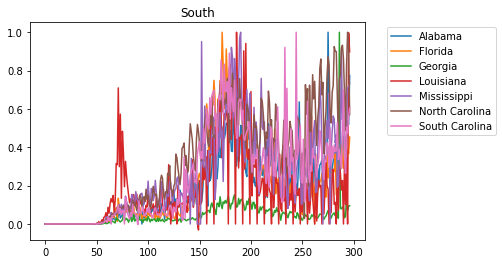

In [72]:
plt.plot(CR_C3.T)
plt.legend(['Alabama', 'Florida', 'Georgia', 'Louisiana', 'Mississippi', 'North Carolina', 'South Carolina', 'SOUTH MEAN'],bbox_to_anchor=(1.05, 1))
plt.title('South')
plt.show()

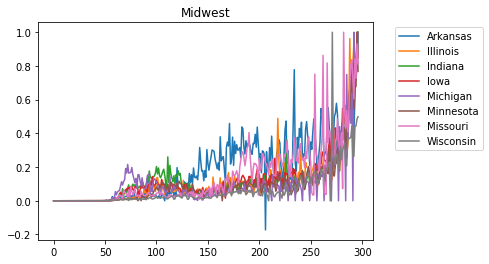

In [74]:
plt.plot(CR_C4.T)
plt.legend(['Arkansas','Illinois', 'Indiana', 'Iowa', 'Michigan', 'Minnesota', 'Missouri','Wisconsin', 'MW MEAN'], bbox_to_anchor=(1.05, 1))
plt.title('Midwest')
plt.show()

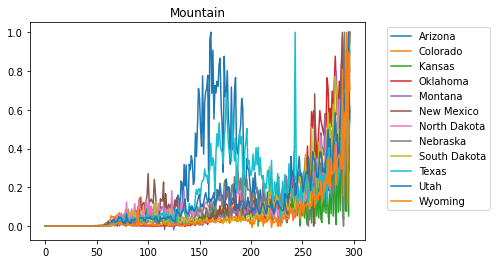

In [73]:
plt.plot(CR_C5.T)
plt.legend(['Arizona','Colorado','Kansas', 'Oklahoma', 'Montana','New Mexico','North Dakota','Nebraska','South Dakota','Texas','Utah','Wyoming', 'MT MEAN'], bbox_to_anchor=(1.05, 1))
plt.title('Mountain')
plt.show()

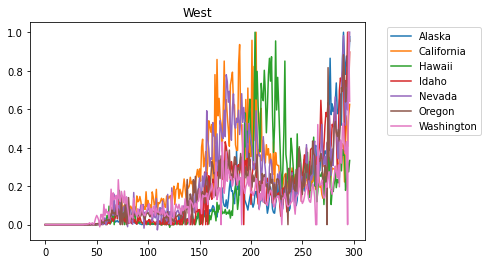

In [75]:
plt.plot(CR_C6.T)
plt.legend(['Alaska', 'California', 'Hawaii', 'Idaho', 'Nevada', 'Oregon', 'Washington', 'WEST MEAN'], bbox_to_anchor=(1.05, 1))
plt.title('West')
plt.show()

# Remove 7-day Average

## PCA

In [77]:
def rem_window_avg(state, W):
    state_w = np.zeros((297))
    for n in range(len(state)):
        no = np.max([1, n-W+1])
        state_n = np.sum(state[no:n])
        state_w[n] = state_n/(W)
    state_rem_w = state-state_w
    return state_rem_w,state_w

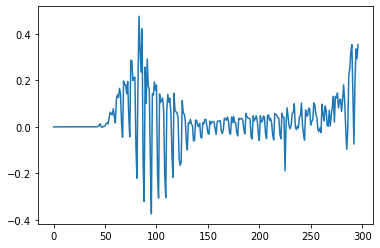

In [61]:
MA_W_N = rem_window_avg(MA,7)
plt.plot(MA_W_N)
plt.show()

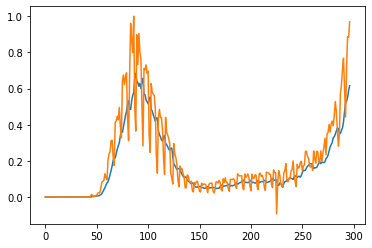

In [62]:
MA_w = MA -  MA_W_N
plt.plot(MA_w)
plt.plot(MA)

In [78]:
states = np.array(["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"])
US_W_N = np.zeros((51, 297))
US_7M = np.zeros((51, 297))
for i in range(len(states)):
    US_W_N[i],US_7M[i] = rem_window_avg(US[i], 7)

In [64]:
def PCA_weekly_rec(state, states, nationwide):
    ind = np.where(states ==  state)
    current = nationwide[ind][0]
    weekly = np.zeros((42,7))
    for i in range(42):
        weekly[i] = current[i*7:i*7+7]
    mu = np.mean(weekly, 0)
    weekly_mr = weekly - mu
    C = weekly_mr@weekly_mr.T
    D,U = np.linalg.eig(C)
    W_main = U[0:1,:]
    Y = W_main@weekly_mr
    weekly_rec = (W_main.T@(Y)) + mu
    weekly_rec_mu = np.mean(weekly_rec, 0)
    return weekly, weekly_mr, weekly_rec, weekly_rec_mu

In [65]:
AK_weekly, AK_weekly_mr, AK_weekly_rec, AK_weekly_rec_mu= PCA_weekly_rec(states[0],states, US_W_N)
AL_weekly, AL_weekly_mr, AL_weekly_rec, AL_weekly_rec_mu= PCA_weekly_rec(states[1],states, US_W_N)
AR_weekly, AR_weekly_mr, AR_weekly_rec, AR_weekly_rec_mu= PCA_weekly_rec(states[2],states, US_W_N)
AZ_weekly, AZ_weekly_mr, AZ_weekly_rec, AZ_weekly_rec_mu= PCA_weekly_rec(states[3],states, US_W_N)
CA_weekly, CA_weekly_mr, CA_weekly_rec, CA_weekly_rec_mu= PCA_weekly_rec(states[4],states, US_W_N)
CO_weekly, CO_weekly_mr, CO_weekly_rec, CO_weekly_rec_mu= PCA_weekly_rec(states[5],states, US_W_N)
CT_weekly, CT_weekly_mr, CT_weekly_rec, CT_weekly_rec_mu= PCA_weekly_rec(states[6],states, US_W_N)
DE_weekly, DE_weekly_mr, DE_weekly_rec, DE_weekly_rec_mu= PCA_weekly_rec(states[7],states, US_W_N)
FL_weekly, FL_weekly_mr, FL_weekly_rec, FL_weekly_rec_mu= PCA_weekly_rec(states[8],states, US_W_N)
GA_weekly, GA_weekly_mr, GA_weekly_rec, GA_weekly_rec_mu= PCA_weekly_rec(states[9],states, US_W_N)
HI_weekly, HI_weekly_mr, HI_weekly_rec, HI_weekly_rec_mu= PCA_weekly_rec(states[10],states, US_W_N)
IA_weekly, IA_weekly_mr, IA_weekly_rec, IA_weekly_rec_mu= PCA_weekly_rec(states[11],states, US_W_N)
ID_weekly, ID_weekly_mr, ID_weekly_rec, ID_weekly_rec_mu= PCA_weekly_rec(states[12],states, US_W_N)
IL_weekly, IL_weekly_mr, IL_weekly_rec, IL_weekly_rec_mu= PCA_weekly_rec(states[13],states, US_W_N)
IN_weekly, IN_weekly_mr, IN_weekly_rec, IN_weekly_rec_mu= PCA_weekly_rec(states[14],states, US_W_N)
KS_weekly, KS_weekly_mr, KS_weekly_rec, KS_weekly_rec_mu= PCA_weekly_rec(states[15],states, US_W_N)
KY_weekly, KY_weekly_mr, KY_weekly_rec, KY_weekly_rec_mu= PCA_weekly_rec(states[16],states, US_W_N)
LA_weekly, LA_weekly_mr, LA_weekly_rec, LA_weekly_rec_mu= PCA_weekly_rec(states[17],states, US_W_N)
MA_weekly, MA_weekly_mr, MA_weekly_rec, MA_weekly_rec_mu= PCA_weekly_rec(states[18],states, US_W_N)
MD_weekly, MD_weekly_mr, MD_weekly_rec, MD_weekly_rec_mu= PCA_weekly_rec(states[19],states, US_W_N)
ME_weekly, ME_weekly_mr, ME_weekly_rec, ME_weekly_rec_mu= PCA_weekly_rec(states[20],states, US_W_N)
MI_weekly, MI_weekly_mr, MI_weekly_rec, MI_weekly_rec_mu= PCA_weekly_rec(states[21],states, US_W_N)
MN_weekly, MN_weekly_mr, MN_weekly_rec, MN_weekly_rec_mu= PCA_weekly_rec(states[22],states, US_W_N)
MO_weekly, MO_weekly_mr, MO_weekly_rec, MO_weekly_rec_mu= PCA_weekly_rec(states[23],states, US_W_N)
MS_weekly, MS_weekly_mr, MS_weekly_rec, MS_weekly_rec_mu= PCA_weekly_rec(states[24],states, US_W_N)
MT_weekly, MT_weekly_mr, MT_weekly_rec, MT_weekly_rec_mu= PCA_weekly_rec(states[25],states, US_W_N)
NC_weekly, NC_weekly_mr, NC_weekly_rec, NC_weekly_rec_mu= PCA_weekly_rec(states[26],states, US_W_N)
ND_weekly, ND_weekly_mr, ND_weekly_rec, ND_weekly_rec_mu= PCA_weekly_rec(states[27],states, US_W_N)
NE_weekly, NE_weekly_mr, NE_weekly_rec, NE_weekly_rec_mu= PCA_weekly_rec(states[28],states, US_W_N)
NH_weekly, NH_weekly_mr, NH_weekly_rec, NH_weekly_rec_mu= PCA_weekly_rec(states[29],states, US_W_N)
NJ_weekly, NJ_weekly_mr, NJ_weekly_rec, NJ_weekly_rec_mu= PCA_weekly_rec(states[30],states, US_W_N)
NM_weekly, NM_weekly_mr, NM_weekly_rec, NM_weekly_rec_mu= PCA_weekly_rec(states[31],states, US_W_N)
NV_weekly, NV_weekly_mr, NV_weekly_rec, NV_weekly_rec_mu= PCA_weekly_rec(states[32],states, US_W_N)
NY_weekly, NY_weekly_mr, NY_weekly_rec, NY_weekly_rec_mu= PCA_weekly_rec(states[33],states, US_W_N)
OH_weekly, OH_weekly_mr, OH_weekly_rec, OH_weekly_rec_mu= PCA_weekly_rec(states[34],states, US_W_N)
OK_weekly, OK_weekly_mr, OK_weekly_rec, OK_weekly_rec_mu= PCA_weekly_rec(states[35],states, US_W_N)
OR_weekly, OR_weekly_mr, OR_weekly_rec, OR_weekly_rec_mu= PCA_weekly_rec(states[36],states, US_W_N)
PA_weekly, PA_weekly_mr, PA_weekly_rec, PA_weekly_rec_mu= PCA_weekly_rec(states[37],states, US_W_N)
PR_weekly, PR_weekly_mr, PR_weekly_rec, PR_weekly_rec_mu= PCA_weekly_rec(states[38],states, US_W_N)
RI_weekly, RI_weekly_mr, RI_weekly_rec, RI_weekly_rec_mu= PCA_weekly_rec(states[39],states, US_W_N)
SC_weekly, SC_weekly_mr, SC_weekly_rec, SC_weekly_rec_mu= PCA_weekly_rec(states[40],states, US_W_N)
SD_weekly, SD_weekly_mr, SD_weekly_rec, SD_weekly_rec_mu= PCA_weekly_rec(states[41],states, US_W_N)
TN_weekly, TN_weekly_mr, TN_weekly_rec, TN_weekly_rec_mu= PCA_weekly_rec(states[42],states, US_W_N)
TX_weekly, TX_weekly_mr, TX_weekly_rec, TX_weekly_rec_mu= PCA_weekly_rec(states[43],states, US_W_N)
UT_weekly, UT_weekly_mr, UT_weekly_rec, UT_weekly_rec_mu= PCA_weekly_rec(states[44],states, US_W_N)
VA_weekly, VA_weekly_mr, VA_weekly_rec, VA_weekly_rec_mu= PCA_weekly_rec(states[45],states, US_W_N)
VT_weekly, VT_weekly_mr, VT_weekly_rec, VT_weekly_rec_mu= PCA_weekly_rec(states[46],states, US_W_N)
WA_weekly, WA_weekly_mr, WA_weekly_rec, WA_weekly_rec_mu= PCA_weekly_rec(states[47],states, US_W_N)
WI_weekly, WI_weekly_mr, WI_weekly_rec, WI_weekly_rec_mu= PCA_weekly_rec(states[48],states, US_W_N)
WV_weekly, WV_weekly_mr, WV_weekly_rec, WV_weekly_rec_mu= PCA_weekly_rec(states[49],states, US_W_N)
WY_weekly, WY_weekly_mr, WY_weekly_rec, WY_weekly_rec_mu= PCA_weekly_rec(states[50],states, US_W_N)

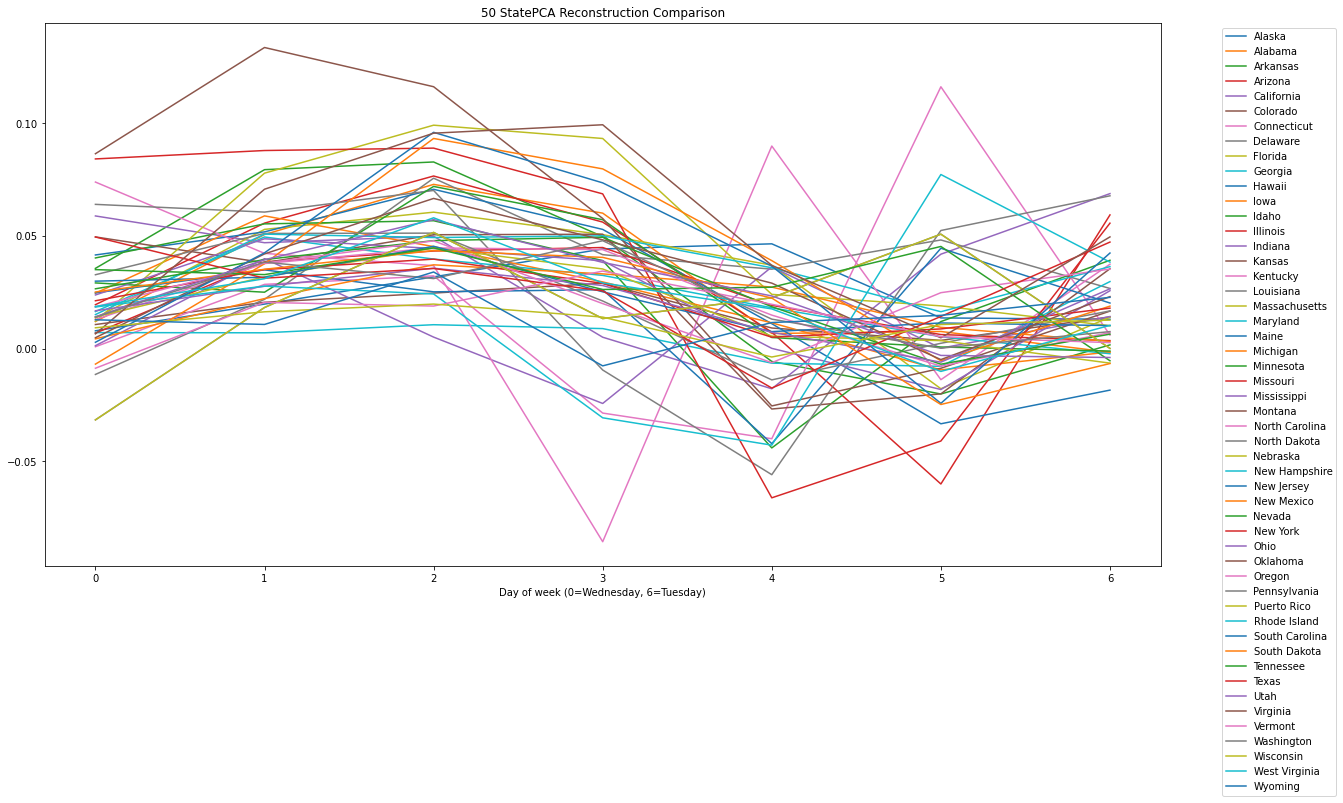

In [66]:
plt.figure(figsize=(20,10))
plt.plot(AK_weekly_rec_mu); plt.plot(AL_weekly_rec_mu); plt.plot(AR_weekly_rec_mu); plt.plot(AZ_weekly_rec_mu)
plt.plot(CA_weekly_rec_mu); 
plt.plot(CO_weekly_rec_mu); plt.plot(CT_weekly_rec_mu); plt.plot(DE_weekly_rec_mu); plt.plot(FL_weekly_rec_mu)
plt.plot(GA_weekly_rec_mu); 
plt.plot(HI_weekly_rec_mu); plt.plot(IA_weekly_rec_mu); plt.plot(ID_weekly_rec_mu)
plt.plot(IN_weekly_rec_mu); plt.plot(KS_weekly_rec_mu); plt.plot(KY_weekly_rec_mu); plt.plot(LA_weekly_rec_mu)
plt.plot(MA_weekly_rec_mu); 
plt.plot(MD_weekly_rec_mu); plt.plot(ME_weekly_rec_mu); plt.plot(MI_weekly_rec_mu)
plt.plot(MN_weekly_rec_mu); plt.plot(MO_weekly_rec_mu); plt.plot(MS_weekly_rec_mu); plt.plot(MT_weekly_rec_mu)
plt.plot(NC_weekly_rec_mu); plt.plot(ND_weekly_rec_mu); plt.plot(NE_weekly_rec_mu); plt.plot(NH_weekly_rec_mu)
plt.plot(NJ_weekly_rec_mu); plt.plot(NM_weekly_rec_mu); plt.plot(NV_weekly_rec_mu); plt.plot(NY_weekly_rec_mu)
plt.plot(OH_weekly_rec_mu); plt.plot(OK_weekly_rec_mu); plt.plot(OR_weekly_rec_mu); plt.plot(PA_weekly_rec_mu)
plt.plot(PR_weekly_rec_mu); plt.plot(PR_weekly_rec_mu); plt.plot(RI_weekly_rec_mu); plt.plot(SC_weekly_rec_mu)
plt.plot(SD_weekly_rec_mu); plt.plot(TN_weekly_rec_mu); plt.plot(TX_weekly_rec_mu); plt.plot(UT_weekly_rec_mu)
plt.plot(VA_weekly_rec_mu); plt.plot(VT_weekly_rec_mu); plt.plot(WA_weekly_rec_mu); plt.plot(WI_weekly_rec_mu)
plt.plot(WV_weekly_rec_mu); plt.plot(WY_weekly_rec_mu)
plt.legend(states, bbox_to_anchor=(1.05, 1))
plt.xlabel('Day of week (0=Wednesday, 6=Tuesday)')
plt.title('50 StatePCA Reconstruction Comparison')
#plt.ylim([0, 1300])
plt.show()

## Cases

In [81]:
#northeast
CR_71 = np.array([US_7M[6,:], US_7M[18,:], US_7M[20,:], US_7M[29,:], US_7M[30,:], US_7M[33,:], US_7M[38,:], US_7M[39,:], US_7M[46,:]])
#mid atlantic
CR_72 = np.array([US_7M[7,:], US_7M[16,:], US_7M[19,:], US_7M[34,:], US_7M[37,:], US_7M[42,:], US_7M[45,:], US_7M[49,:]])
#south
CR_73 = np.array([US_7M[1,:], US_7M[8,:], US_7M[9,:], US_7M[17,:], US_7M[24,:], US_7M[26,:], US_7M[40,:]])
#midwest
CR_74 = np.array([US_7M[2,:], US_7M[11,:], US_7M[13,:], US_7M[14,:], US_7M[21,:], US_7M[22,:], US_7M[23,:], US_7M[48,:]])
#mountain
CR_75 = np.array([US_7M[3,:], US_7M[5,:], US_7M[15,:], US_7M[25,:], US_7M[27,:], US_7M[28,:], US_7M[31,:], US_7M[35,:], US_7M[41,:], US_7M[43,:], US_7M[44,:], US_7M[50,:]])
#west
CR_76 = np.array([US_7M[0,:], US_7M[4,:], US_7M[10,:], US_7M[12,:], US_7M[32,:], US_7M[36,:], US_7M[47,:]])

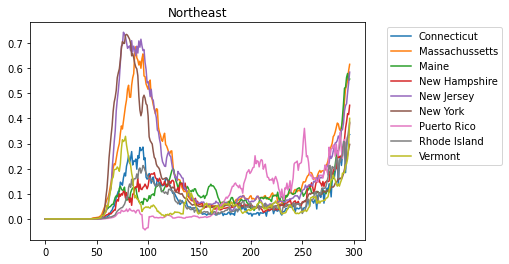

In [84]:
plt.plot(CR_71.T)
plt.legend(['Connecticut', 'Massachussetts', 'Maine', 'New Hampshire','New Jersey', 'New York','Puerto Rico', 'Rhode Island','Vermont', 'NE MEAN'], bbox_to_anchor=(1.05, 1))
plt.title('Northeast')
plt.show()

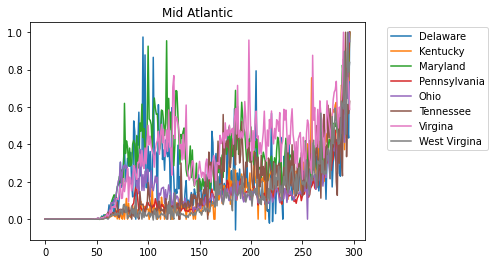

In [85]:
plt.plot(CR_C2.T)
plt.legend(['Delaware','Kentucky','Maryland','Pennsylvania', 'Ohio', 'Tennessee' ,'Virgina','West Virgina', 'MA MEAN'],bbox_to_anchor=(1.05, 1))
plt.title('Mid Atlantic')
plt.show()

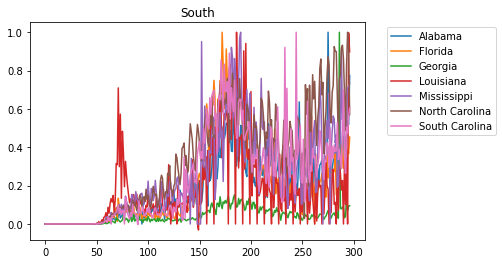

In [86]:
plt.plot(CR_C3.T)
plt.legend(['Alabama', 'Florida', 'Georgia', 'Louisiana', 'Mississippi', 'North Carolina', 'South Carolina', 'SOUTH MEAN'],bbox_to_anchor=(1.05, 1))
plt.title('South')
plt.show()

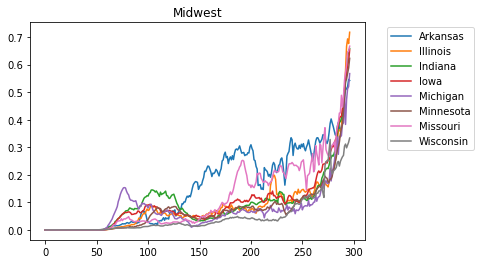

In [88]:
plt.plot(CR_74.T)
plt.legend(['Arkansas','Illinois', 'Indiana', 'Iowa', 'Michigan', 'Minnesota', 'Missouri','Wisconsin', 'MW MEAN'], bbox_to_anchor=(1.05, 1))
plt.title('Midwest')
plt.show()

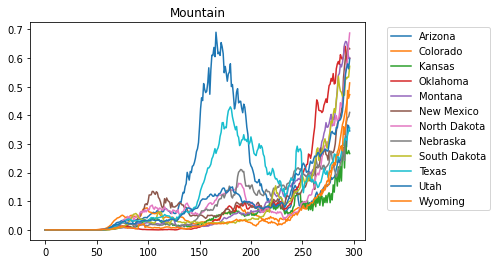

In [89]:
plt.plot(CR_75.T)
plt.legend(['Arizona','Colorado','Kansas', 'Oklahoma', 'Montana','New Mexico','North Dakota','Nebraska','South Dakota','Texas','Utah','Wyoming', 'MT MEAN'], bbox_to_anchor=(1.05, 1))
plt.title('Mountain')
plt.show()

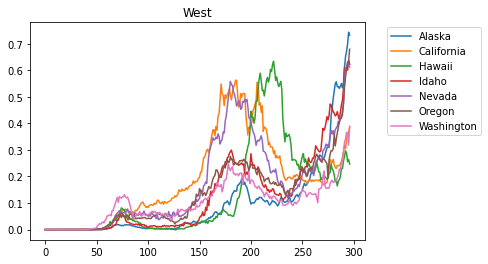

In [90]:
plt.plot(CR_76.T)
plt.legend(['Alaska', 'California', 'Hawaii', 'Idaho', 'Nevada', 'Oregon', 'Washington', 'WEST MEAN'], bbox_to_anchor=(1.05, 1))
plt.title('West')
plt.show()